In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [192]:
data = pd.read_csv("data/cars_hw.csv")
data.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [193]:
data["Price"].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

In [194]:
cleaned_data = data
cleaned_data['price_ihs'] = np.arcsinh(cleaned_data['Price'])
cleaned_data['mileage_ihs'] = np.arcsinh(cleaned_data['Mileage_Run'])
cleaned_data['age'] = max(cleaned_data['Make_Year'])-cleaned_data['Make_Year']
cleaned_data = cleaned_data.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
cleaned_data.columns

Index(['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Seating_Capacity',
       'Fuel_Type', 'Transmission', 'Transmission_Type', 'price_ihs',
       'mileage_ihs', 'age'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Density'>

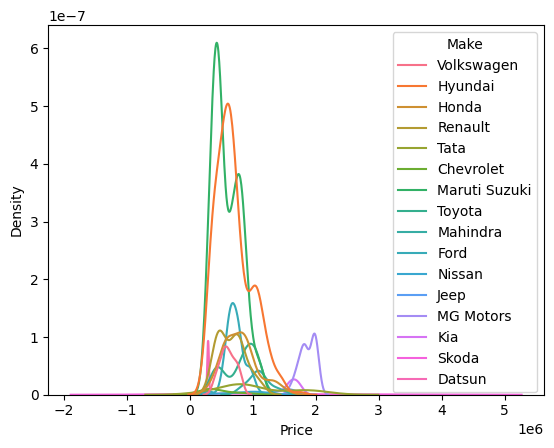

In [195]:
sns.kdeplot(data = data, x='Price', hue = 'Make')

In [196]:
data["Price"].groupby(data['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


<Axes: xlabel='price_ihs', ylabel='Density'>

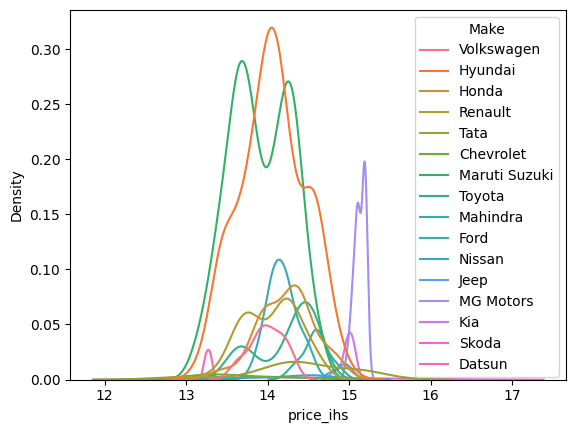

In [197]:
sns.kdeplot(data = cleaned_data,x="price_ihs",hue = 'Make' )

In [198]:
cleaned_data['price_ihs'].groupby(cleaned_data['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


MG Motors, Kia, and Jeep are the most expensive vehicles. All Prices are above 13 for the most part

In [199]:
N = cleaned_data.shape[0]
cleaned_data = cleaned_data.sample(frac=1, random_state=100) 
train_size = int(.8*N)

In [200]:
cleaned_data_train = cleaned_data[:train_size]
y_train = cleaned_data_train['price_ihs']

cleaned_data_test = cleaned_data[train_size:]
y_test = cleaned_data_test['price_ihs']

In [201]:
vars = ['age','mileage_ihs','Seating_Capacity']
x_train = cleaned_data_train.loc[:,vars]
regress_total = linear_model.LinearRegression().fit(x_train,y_train)
x_test = cleaned_data_test.loc[:,vars]
y_pred = regress_total.predict(x_test)
regress_total.score(x_test,y_test)

0.45254262356326824

In [202]:
RMSE = np.sqrt( np.mean( (y_test - y_pred)**2 ))
RMSE


0.3339265473590646

First Model
- R^2 = 0.45254262356326824
- RMSE = 0.3339265473590646

In [203]:
vars2 = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
dummies = pd.DataFrame([])
for var in vars2: 
    new_dummies = pd.get_dummies( cleaned_data.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    x_train2 = dummies.iloc[0:train_size,:]
    x_test2 = dummies.iloc[train_size:,:]

In [204]:
regression = linear_model.LinearRegression().fit(x_train2,y_train) # Run regression
y_pred2 = regression.predict(x_test2)
regression.score(x_test2,y_test)

0.6298129532407459

In [205]:
RMSE = np.sqrt( np.mean( (y_test - y_pred2)**2 ))
RMSE

0.27459106425227287

Second Model
- R^2 = 0.6298129532407459
- RMSE = 0.27459106425227287

In [206]:
x_train_total = pd.concat([x_train, x_train2],axis=1, ignore_index=True)
x_test_total = pd.concat([x_test, x_test2],axis=1, ignore_index=True)
regress_total = linear_model.LinearRegression().fit(x_train_total,y_train) 
y_pred_total = regress_total.predict(x_test_total)
regress_total.score(x_test_total,y_test)

0.7999206763763921

In [207]:
rmse_total = np.sqrt( np.mean( (y_test - y_pred_total)**2 ))
rmse_total

0.20187237686198914

Third Model
- R^2 = 0.7999206763763921
- RMSE = 0.20187237686198914

This model is clearly the one that performs the best.

In [208]:
for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    z = expander.fit_transform(x_test)
    n = expander.get_feature_names_out()
    x_test_new = pd.DataFrame(data=z, columns = n)
    z = expander.fit_transform(x_train)
    n = expander.get_feature_names_out()

    x_train_new = pd.DataFrame(data=z, columns = n)
    x_train_new.reset_index(drop=True, inplace=True)
    x_train2.reset_index(drop=True, inplace=True)
    x_train_total = pd.concat([x_train_new, x_train2], axis=1, ignore_index=True)

    x_test_new.reset_index(drop=True, inplace=True)
    x_test2.reset_index(drop=True, inplace=True)
    x_test_total = pd.concat([x_test_new, x_test2], axis=1, ignore_index=True)
    
    regress_total = linear_model.LinearRegression().fit(x_train_total,y_train) # Run regression
    print(d, ' Rsq: ', regress_total.score(x_test_total,y_test)) # R2
    y_pred_total = regress_total.predict(x_test_total)
    rmse_total = np.sqrt( np.mean( (y_test - y_pred_total)**2 ))
    print(d, 'RMSE: ', rmse_total) # R2

1  Rsq:  0.7999206763763921
1 RMSE:  0.20187237686198914
2  Rsq:  0.8025408094604634
2 RMSE:  0.20054621389085792
3  Rsq:  0.7996599800455877
3 RMSE:  0.20200385035768978
4  Rsq:  -8416370553.553814
4 RMSE:  41403.610592248784


The best degree would be degree 2, with an:

- R^2 = 0.8025408094604634
- RMSE = 0.20054621389085792